In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing important files....
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/combine dataset.xlsx')

In [ ]:
df

,PATNO,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000.0,BL,1.0,2.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000.0,V04,0.0,2.0,0.0,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000.0,V06,2.0,1.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000.0,V08,3.0,2.0,0.0,1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,V10,1.0,1.0,1.0,1.0,1,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,NaN,NaN,2.0,2.0,2.0,0.0,0,0,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,NaN,NaN,4.0,2.0,3.0,1.0,1,1,3,3,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,NaN,NaN,0.0,0.0,1.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:

#Defining features(X) and labels(Y)....
X = df.drop(['Status','PATNO','EVENT_ID'],axis =1).values
y = df['Status'].values

In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

True

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
final_dataset = pd.DataFrame(X)
final_dataset

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7142,4.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0
7143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature scaling
feature_X = StandardScaler().fit_transform(X)
feature_X = pd.DataFrame(feature_X)
feature_X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.055939,1.192485,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
1,-0.952090,1.192485,-0.882279,0.262137,-0.710299,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
2,0.840213,0.048973,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
3,1.736364,1.192485,-0.882279,0.262137,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
4,-0.055939,0.048973,0.208736,0.262137,0.613937,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,0.909480,1.117210,1.214879,1.049550,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,0.840213,1.192485,1.299751,-0.842207,-0.710299,-0.565344,1.412823,1.688776,3.136251,-0.433007,...,0.909480,-0.577949,-0.585763,1.049550,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
7142,2.632515,1.192485,2.390765,0.262137,0.613937,0.864726,2.553489,2.878562,3.136251,1.477034,...,0.909480,1.117210,1.214879,1.049550,1.354201,0.606882,-0.316174,-0.300952,-0.25135,1.325128
7143,-0.952090,-1.094538,-0.882279,-0.842207,-0.710299,-0.565344,-0.868509,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968
7144,-0.952090,-1.094538,0.208736,-0.842207,-0.710299,-0.565344,0.272157,-0.690795,-0.665878,-0.433007,...,-0.593624,-0.577949,-0.585763,-0.632367,-0.652106,-0.581595,-0.316174,-0.300952,-0.25135,-0.896968


In [ ]:
#over sampling
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(feature_X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (11774, 53)
After OverSampling, the shape of train_y: (11774,) 

After OverSampling, counts of label '1': 5887
After OverSampling, counts of label '0': 5887


In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [ ]:
n_features=53
count=len(final_dataset.columns)
x=count/n_features
x

1.0

In [ ]:
#Definimng model
model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= x, min_samples_leaf= 6)

In [ ]:
#Fitting the defined model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=1.0,
                       min_samples_leaf=6)

In [ ]:
#Prediction
y_pred = model_dt.predict(X_test)

In [ ]:
model_dt.score(X_train,y_train)

0.9915065293555579

In [ ]:
#Model score
model_dt.score(X_test,y_test)

0.9796178343949045

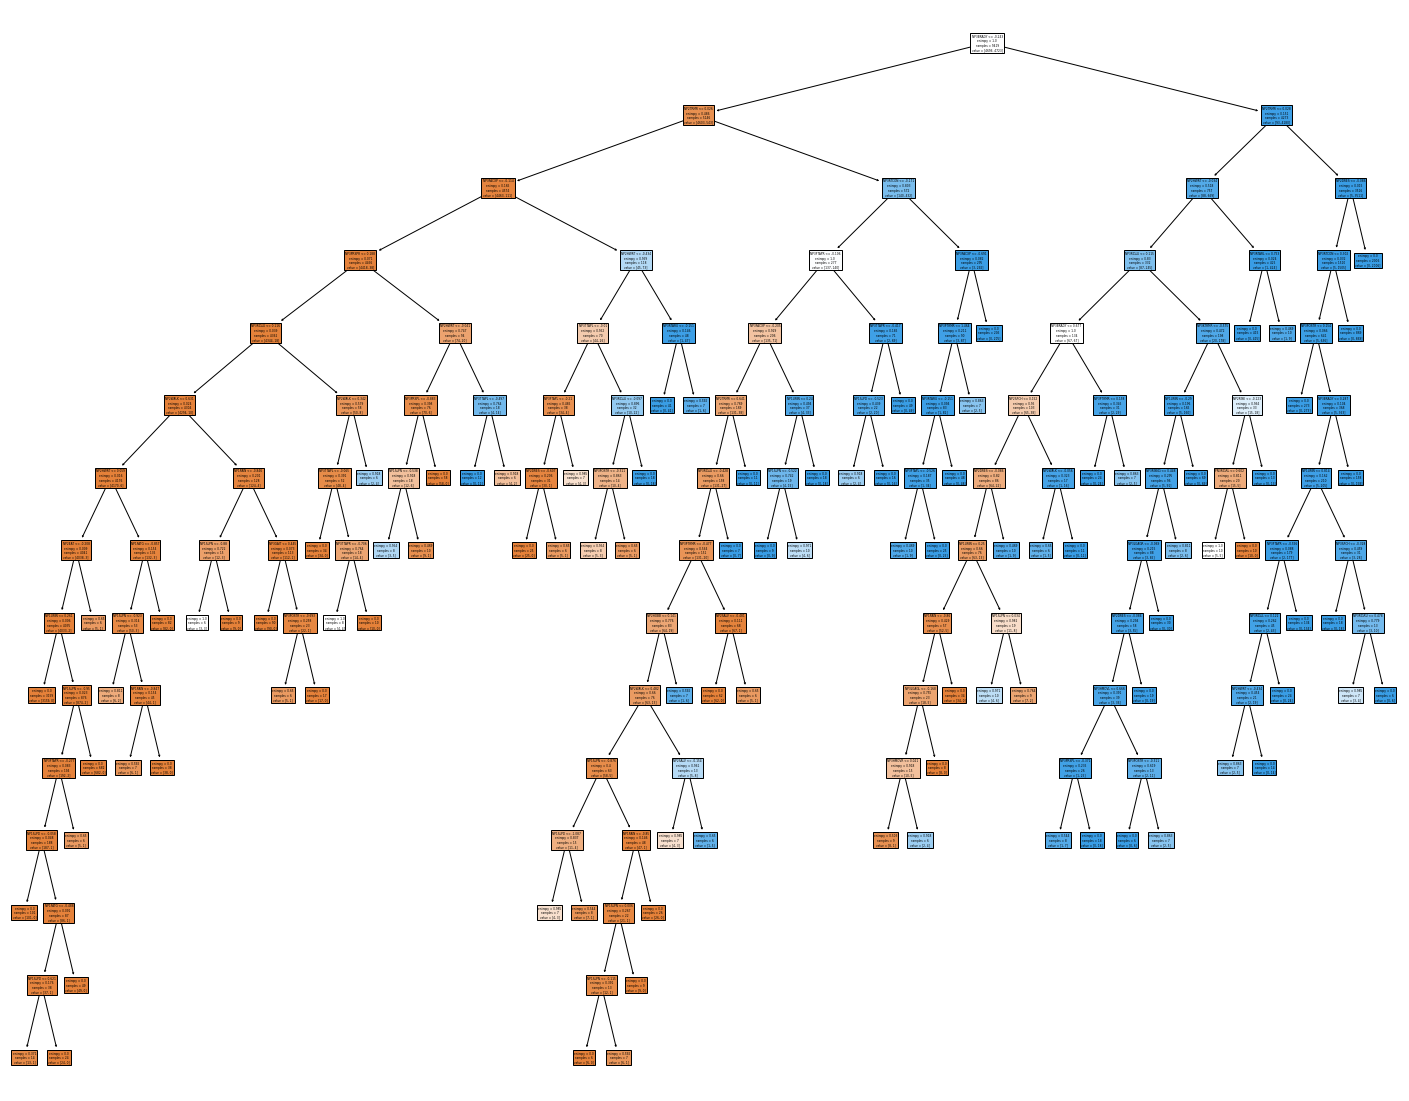

In [ ]:
#Visualization of tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt, feature_names=feature_names, filled=True)
plt.savefig('DT.png')

In [ ]:
X_test.shape

(2355, 53)

[[1170   21]
 [  27 1137]]


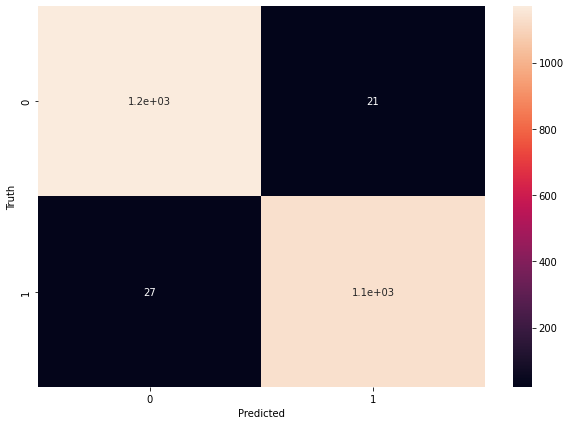

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('DT_cm.png')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.02038216560509554
MSE: 0.02038216560509554
RMSE: 0.14276612204964992


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.981865
Recall: 0.976804
F1 score: 0.979328


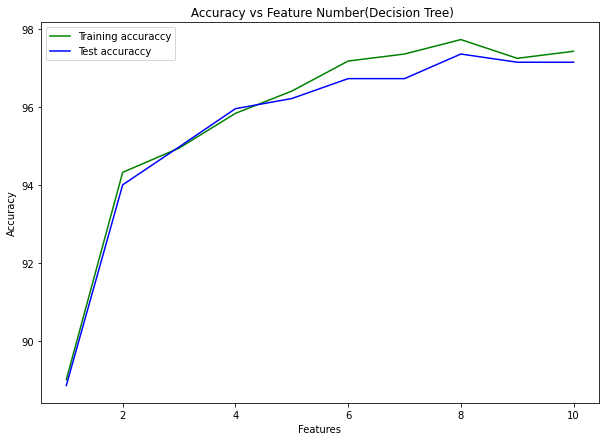

In [ ]:
train_accuracy =[89.02,94.33,94.95,95.84,96.41,97.18,97.36,97.73,97.25,97.43]
test_accuracy =[88.87,94.01,94.98,95.96,96.22,96.73,96.73,97.36,97.15,97.15]

features = range(1,11)
plt.figure(figsize=(10,7))
plt.plot(features, train_accuracy, 'g', label='Training accuraccy')
plt.plot(features, test_accuracy, 'b', label='Test accuraccy')
plt.title(' Accuracy vs Feature Number(Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('DT_accuraccy_vs_features.png')

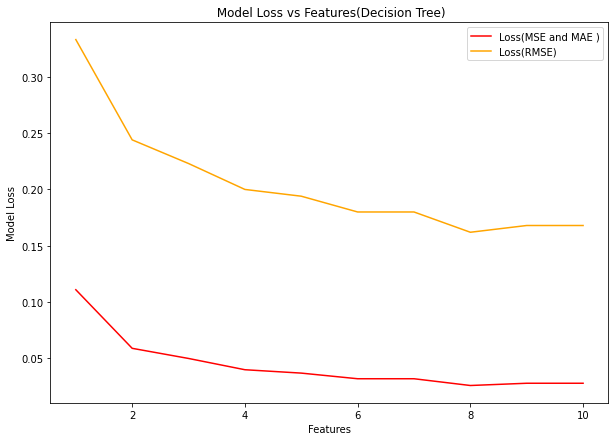

In [ ]:
MSE_loss =[0.111,0.059,0.05,0.04,0.037,0.032,0.032,0.026,0.028,0.028]
RMSE_loss =[0.333,0.244,0.223,0.2,0.194,0.18,0.18,0.162,0.168,0.168]

features = range(1,11)
plt.figure(figsize=(10,7))
plt.plot(features, MSE_loss, 'red', label='Loss(MSE and MAE )')
plt.plot(features,RMSE_loss, 'orange', label='Loss(RMSE)')
plt.title(' Model Loss vs Features(Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Model Loss')
plt.legend()
plt.savefig('DT_loss_vs_features.png')